<a href="https://colab.research.google.com/github/akashaky/github-demo/blob/master/Tomato_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"akashkumarpandey","key":"72f3b7d130236604cc4258ea79953c89"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.
!kaggle datasets download -d kaustubhb999/tomatoleaf

chmod: cannot access '/root/.kaggle/kaggle.': No such file or directory
tomatoleaf.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from zipfile import ZipFile
file_name= "tomatoleaf.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [67]:
transform_train =transforms.Compose([
        transforms.RandomResizedCrop(128),
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])
transform_test =transforms.Compose([
        # transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])

In [68]:
train_dataset = torchvision.datasets.ImageFolder(root= "/content/tomato/train", transform=transform_train)

In [69]:
num_classes=10
batch_size=4

In [70]:
trainloader= torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, shuffle= True)


In [71]:
def imshow(img,title):
  npimg = img.numpy()/2 +0.5
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [72]:
dataiter= iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 128, 128])
torch.Size([3, 128, 128])
5


In [73]:
def show_batch_images(dataloader):
  images,labels= next(iter(dataloader))
  img= torchvision.utils.make_grid(images)
  imshow(img, title= [str(x.item()) for x in labels])

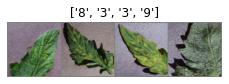

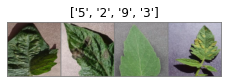

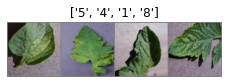

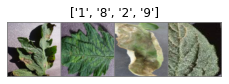

In [74]:
for i in range(4):
  show_batch_images(trainloader)

#CNN

In [75]:
class FirstCNN_2(nn.Module):
  def __init__(self):
    super(FirstCNN_2,self).__init__()
    self.model=nn.Sequential(
        nn.Conv2d(3,6,7),
        nn.AvgPool2d(4,stride=4),
        nn.Conv2d(6,16,7),
         nn.AvgPool2d(4,stride=4)
    )

  def forward(self,x):
    x=self.model(x)
    return x

In [76]:
net = FirstCNN_2()
out=net(images)
out.shape

torch.Size([4, 16, 6, 6])

In [98]:
class  LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,7),
        nn.ReLU(),
        nn.AvgPool2d(4,stride=4),
        nn.Conv2d(6,16,7),
        nn.ReLU(),
        nn.AvgPool2d(4,stride=4)
    )
    self.fc_model =nn.Sequential(
      nn.Linear(576,400),
      nn.ReLU(),
      nn.Linear(400,120),
      nn.ReLU(),
      nn.Linear(120,10)
    )
  def forward(self,x):
      # print(x.shape)
      x= self.cnn_model(x)
      # print(x.shape)
      x=x.view(x.size(0),-1) #flatening of tensor such that such that it has same dimension as the first index(batch) and everything i.e 16,5,5 collapse to one index
      # print(x.shape)
      x=self.fc_model(x)
      # print(x.shape)
      return x

In [80]:
net= LeNet()
out= net(images)
print(out)

tensor([[ 0.0374, -0.0337,  0.0059, -0.0434, -0.0184, -0.0974,  0.0386, -0.0707,
          0.0064,  0.0830],
        [ 0.0311, -0.0396, -0.0036, -0.0334, -0.0151, -0.0964,  0.0357, -0.0788,
          0.0070,  0.0782],
        [ 0.0411, -0.0336,  0.0054, -0.0397, -0.0157, -0.0928,  0.0336, -0.0752,
         -0.0035,  0.0733],
        [ 0.0411, -0.0384,  0.0104, -0.0444, -0.0223, -0.1017,  0.0387, -0.0755,
          0.0029,  0.0678]], grad_fn=<AddmmBackward>)


In [81]:
batch_size=128
trainset = torchvision.datasets.ImageFolder(root= "/content/tomato/train", transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset= torchvision.datasets.ImageFolder(root= "/content/tomato/val", transform=transform_train)
testloader= torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [82]:
def evaluation(dataLoader):
  total,correct=0,0
  for data in dataLoader:
    inputs,labels=data
    outputs=net(inputs)
    _,pred = torch.max((outputs.data),1)
    total=total+labels.size(0)
    correct+=(pred==labels).sum().item()
    return 100*correct/total

In [83]:
import torch.optim as optim
loss_fn= nn.CrossEntropyLoss()
opt= optim.Adam(net.parameters())

0 16 23.4375 25.78125
1 16 53.125 51.5625
2 16 52.34375 49.21875
3 16 51.5625 57.8125
4 16 67.96875 59.375
5 16 67.96875 60.9375
6 16 67.96875 74.21875
7 16 71.09375 70.3125
8 16 71.875 73.4375
9 16 71.09375 73.4375
10 16 72.65625 78.90625
11 16 74.21875 70.3125
12 16 71.875 82.8125
13 16 72.65625 67.1875
14 16 60.9375 78.90625
15 16 81.25 80.46875


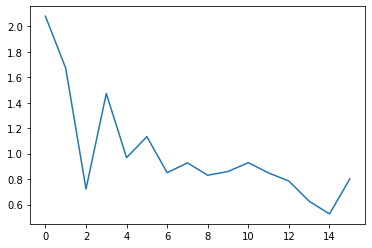

CPU times: user 15min 32s, sys: 42.2 s, total: 16min 15s
Wall time: 16min 15s


In [84]:
%%time
loss_arr=[]
loss_epoch_arr=[]
max_e=16

for epoch in range(max_e):
  for i, data in enumerate(trainloader,0):
    inputs,labels=data
    opt.zero_grad()
    outputs=net(inputs)
    loss= loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print(epoch,max_e, evaluation(testloader), evaluation(trainloader))

plt.plot(loss_epoch_arr)
plt.show()



In [96]:
LeNet.state_dict()


TypeError: ignored